---
title: "Dimensionality reduction"
format: 
  html:
    code-fold: false
execute: 
  enabled: true
---

## Brife introduction
Dimensionality reduction is a technique employed in data analysis and machine learning to reduce the number of features or variables in a dataset while preserving its essential information. High-dimensional datasets with many features can pose challenges, such as increased computational complexity, potential overfitting, and difficulty in visualization. Dimensionality reduction methods aim to address these issues by transforming the data into a lower-dimensional representation.

Two common approaches to dimensionality reduction are:

### Feature Selection:

1. Feature selection involves choosing a subset of the original features.
2. Methods may be filter-based (e.g., based on statistical tests), wrapper-based (e.g., using models to evaluate subsets), or embedded (e.g., incorporated into the model training process).
3. Selected features are retained, and others are discarded.

### Feature Extraction:

1. Feature extraction creates new features as combinations of the original ones.
2. Principal Component Analysis (PCA) is a widely used linear technique that transforms the data into a set of uncorrelated features called principal components.
3. Other methods, such as t-distributed Stochastic Neighbor Embedding (t-SNE) or Uniform Manifold Approximation and Projection (UMAP), are nonlinear and can capture complex relationships in the data.

## Using PCA on the dataset: Tesla Deaths - Deaths

### Import necessary libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Create the features and target dataframes and plot the proportion of variance explained on the y-axis of the bar plot (composed of the 6 features)
We set 'Tesla driver' as the target variable, which indicates whether or not the Tesla driver is killed in the accident.

([<matplotlib.axis.XTick at 0x2234f5db4c0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

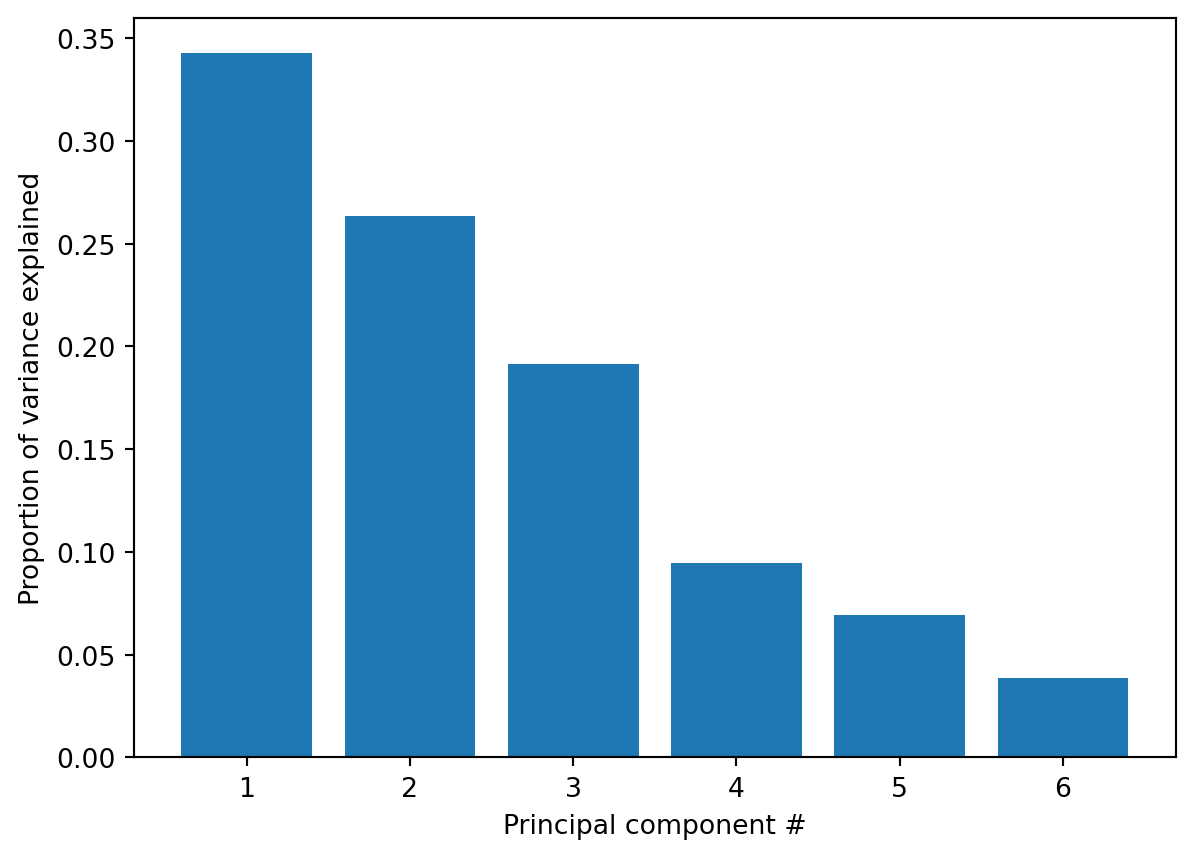

In [2]:
df = pd.read_csv('./cleandata/cleanTelsa.csv')
features = df[['CP','tsla+cp', 'VTAD', 'Claimed', 'Tesla_occupant','Other_vehicle']]
target = df['Tesla_driver']
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
pca = PCA()
pca.fit(features_scaled)
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3, 4, 5, 6])

### Compute the cumulative proportion of variance explained by the first two principal components

In [3]:
two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[1]
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

The cumulative variance of the first two principal components is 0.60595


## Now let's visualize the first two principal components 
The first two principal components together capture a decent proportion of the variation (60%) from all six features

### Create a scatter plot of the first principle components and explore how the states cluster together

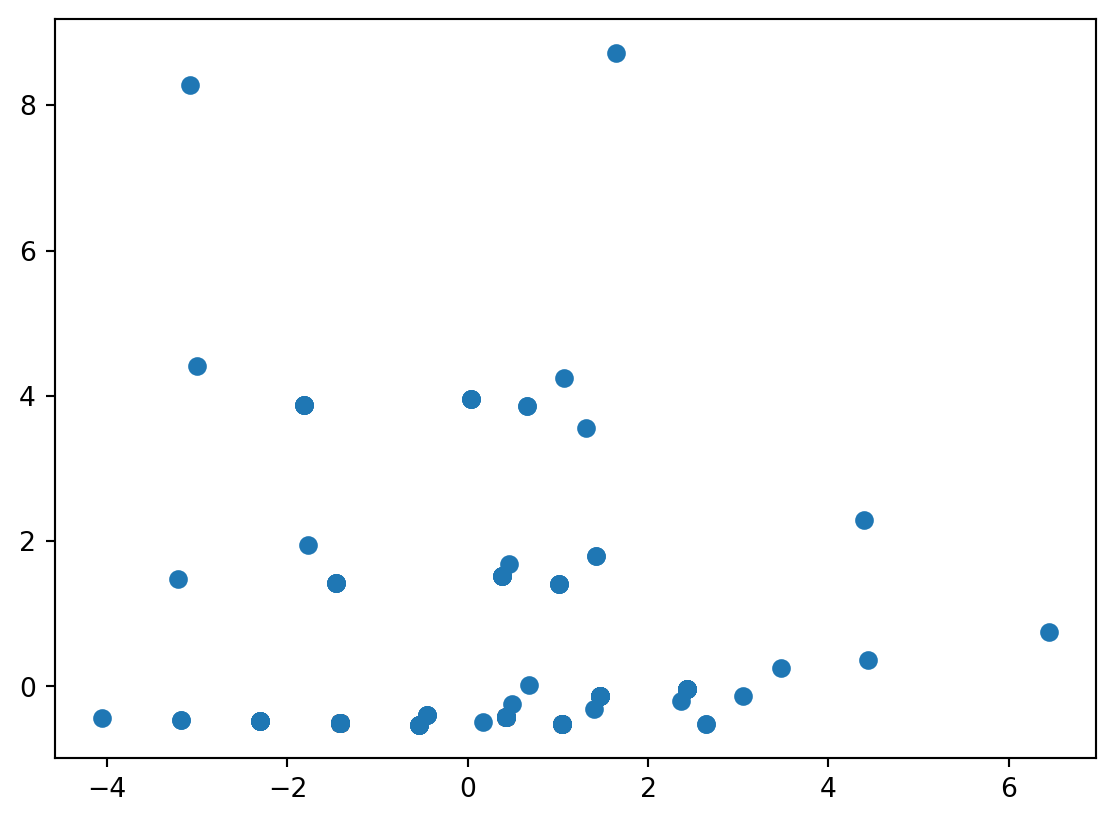

In [4]:
pca = PCA(n_components=2)
p_comps = pca.fit_transform(features_scaled)
p_comp1 = p_comps[:,0]
p_comp2 = p_comps[:,1]
plt.scatter(p_comp1,p_comp2)
plt.show()

## Summary:
It was not entirely clear from the PCA scatter plot where the clusters are. However, we do know that there are only two values that 'Tesla-driver' variable can take, hence we can cluster the data into 2 groups using techniques such as K-Means.

## Using t-SNE

In [5]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(features_scaled)
tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne component 1', 'tsne component 2'])
print(tsne_df.shape)
tsne_df.head()

(294, 2)


,tsne component 1,tsne component 2
0,123.198708,99.458725
1,161.351639,139.500549
2,-36.251751,274.276825
3,115.615074,-26.885727
4,10.898621,-296.469269


### t-SNE plot in 2D coloured by class

C:\Users\23898\AppData\Local\Temp\ipykernel_20076\977625591.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], cmap="brg", s=40)


Text(0, 0.5, 'tsne component 2')

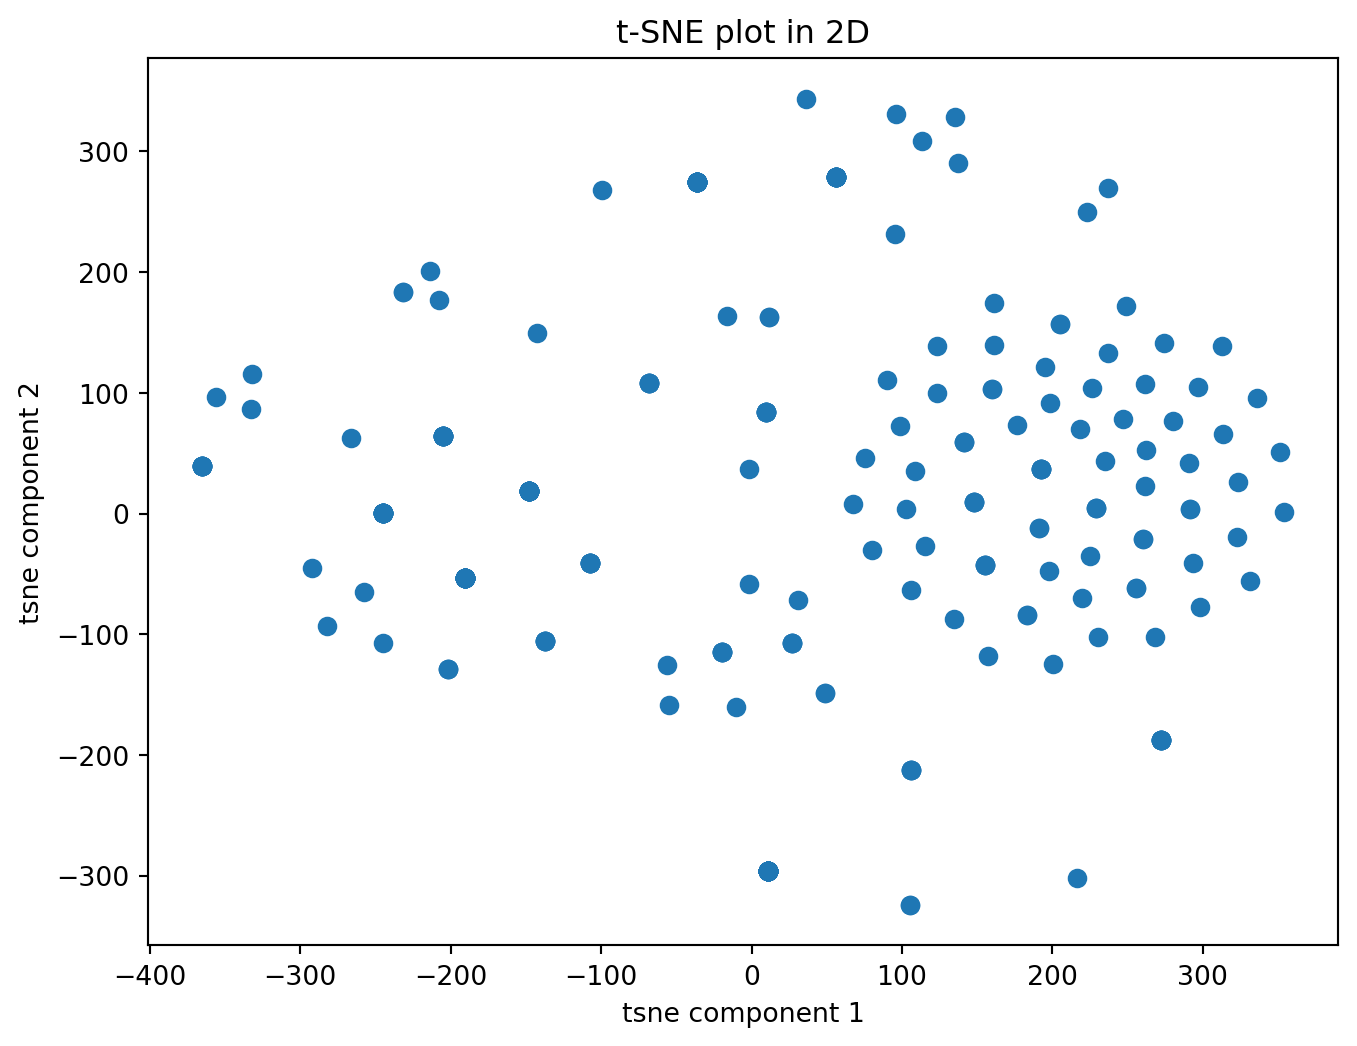

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], cmap="brg", s=40)
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

## Summary
Like PCA, this plot does not give useful information, since we can not tell where are the two clusters. Clustering methods such as 'K-Means' should be used.

## Using PCA on the dataset: Traffic Accidents and Vehicles (gas car)

In [7]:
#| code-fold: true
data = pd.read_csv('./Data/RoadAccident.csv')
column_datatypes = set()
for column in data.columns:
    column_datatypes.add(str(data[column].dtype))
X = data.drop(columns='Accident_Severity')
y = data['Accident_Severity']
numerical_features = list()
categorical_features = list()
for column in X.columns:
    # In the dataset we only have float and int64.
    if (data[column].dtype == 'float64' or data[column].dtype == 'int64'):
        numerical_features.append(column)
    # Categorical
    elif (data[column].dtype == 'object'):
        categorical_features.append(column)
data = X[numerical_features]

### Now we have a cleaned dataset with 15 numerical features, and we would like to cluster the accidents into smaller groups in terms of its type

### Start PCA on the dataset with number of components equal to 2

In [8]:
SS=StandardScaler()
X=pd.DataFrame(SS.fit_transform(data), columns=data.columns)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
principal_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
principal_df.head()

,PC1,PC2
0,-1.897439,-1.586021
1,-2.366626,-1.582004
2,-1.868297,-0.569858
3,-2.319698,-0.338332
4,-2.184419,-0.264836


Text(0, 0.5, 'PC2')

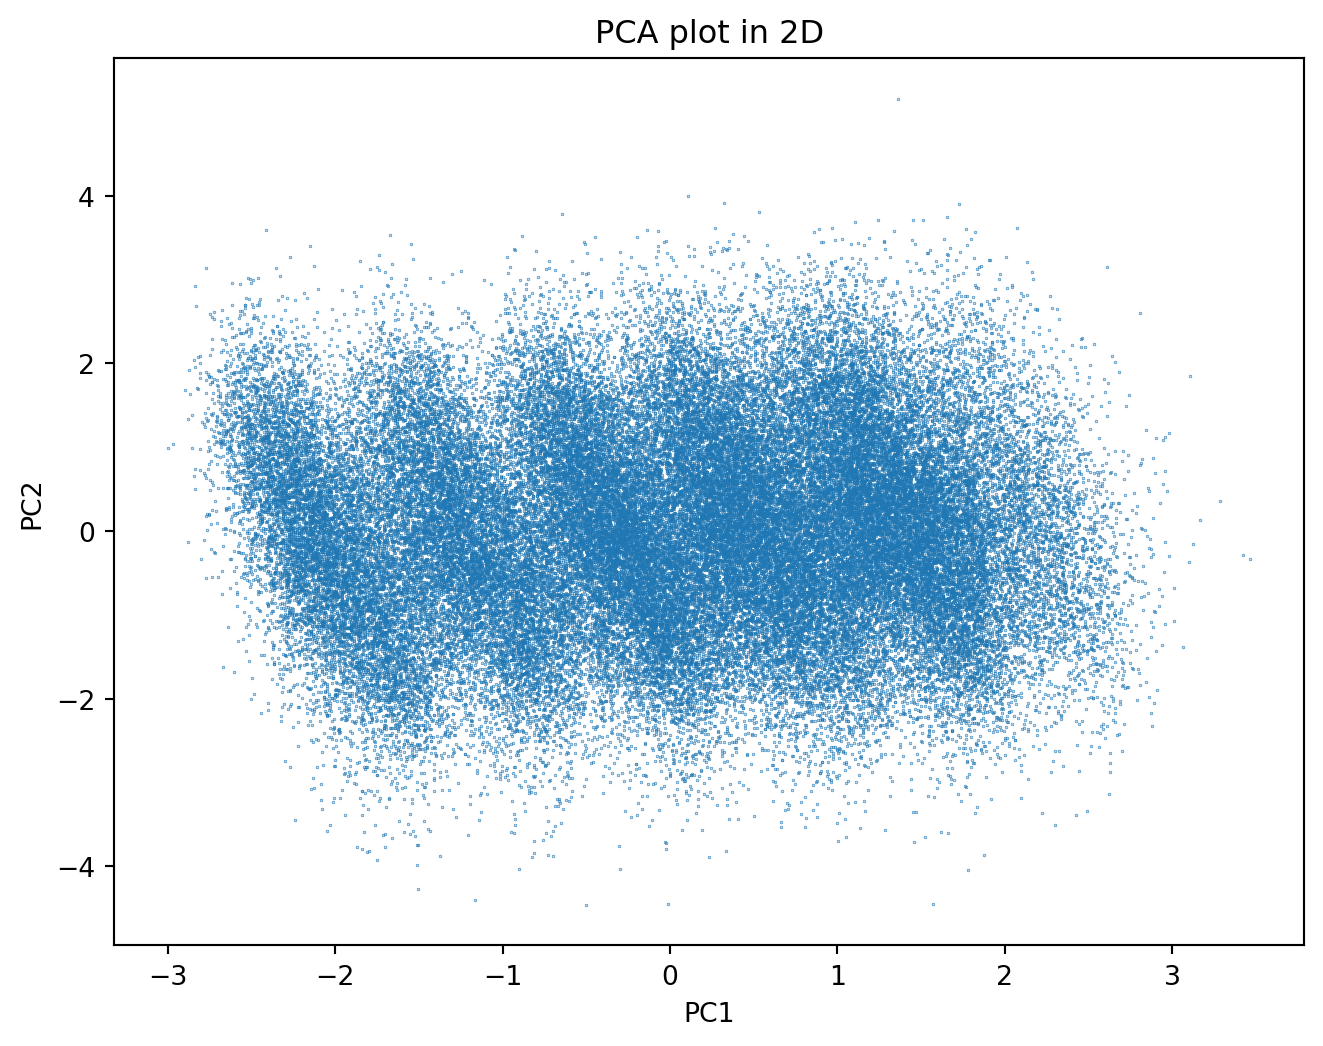

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], s=0.05)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

### In summary:

The depicted group lacks a discernible clustering pattern. To address this, we need to employ a clustering method to delineate distinct clusters within the data.

C:\Users\23898\anaconda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'PC2')

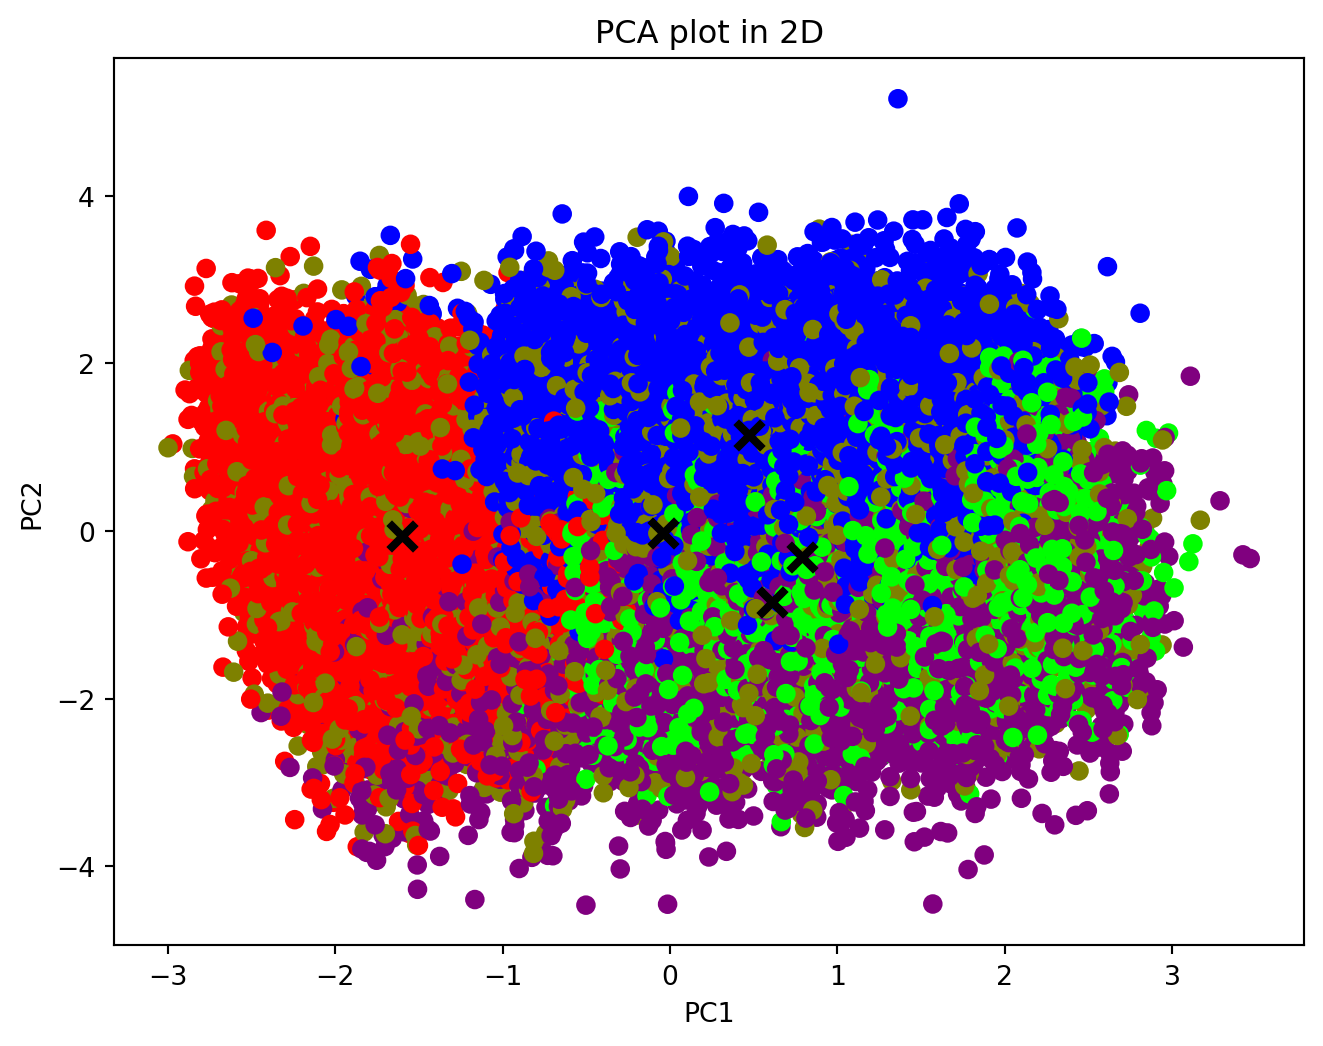

In [10]:
kmeans = KMeans(n_clusters=5, n_init=15, max_iter=500, random_state=0)
clusters = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.figure(figsize=(8,6))
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=100, linewidths=3, color="black")
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')